In [14]:
import numpy as np 
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import norm

# import seaborn as sns; sns.set_theme()

#--- plot parameters --- 
plt.rcParams["figure.figsize"] = (15,10)
plt.rc('font', family = 'serif', serif = 'cmr10') 
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['mathtext.fontset'] = 'stix'

## Original Function

In [15]:
def electric_field(a, b, L, y, N, p):
    Ev = []; x_p = []; λ = 1; C = λ/(8.854187817e-12*4*np.pi); dy = 2*L/N #constant definition 

    for j in np.linspace(a, b, p): # creating points between x = 0 and x = 5 
        x = j 
        x_p.append(j) # appending array to plot x-position to corresponding E-field value with y as a constant. 
        E = 0 # setting E  to zero so summation doesn't  carry. 
        for i in range(1, N + 1): 
            y_i = -L + i*dy
            E = E + (x/((y - y_i)**2 + x**2)**(3/2))*dy
        Ev.append(E)

    Ev = np.array(Ev)*C ; x_p = np.array(x_p) 
    return(x_p, Ev)


## New Function 

In [16]:
def line(L, p2):
    y = []
    for i in np.linspace(-L, L, p2):
        y.append(i)

    x = np.full((p2, ), 0) 
    return np.swapaxes([x, y] , 0, 1)


def line_EF(a, b, lamb, p1, p2, y, L):

    # --- Arrays for Co-ordinates --- 

    r = []; Ex = []; Ey = []; E = [];  final_mag_E = [] #defining empty arrays 
    K = 1/(4*np.pi*8.854187817e-12); D = 1 # diameter of ring and constants 
    r_vec_prime = line(L, p2)

    # print(np.shape(r_vec_prime))

    # --- Looping for various y values, where a and b are the x limits. --- 

    for i in np.linspace(a, b, p1):
        r.append(i) # creating an array of r vectors 
        r_vec = ([i, y]) # r vector used for one set of calculations 
        E = []
            
        for k in range(0, len(r_vec_prime)):
            rt = np.array(r_vec) -  np.array(r_vec_prime[k]) # calculation of R vector. 
            mag = np.linalg.norm(rt) # magnitude of r vector and r' vector 

            # --- calculating component of electric field 

            E_k = lamb*((rt)/mag**3)
            E.append(E_k)

        # --- Summation --- 

        final_mag_E.append(np.sum(E, axis = 0))
        
    return np.array(final_mag_E)*K, r

## Cylinder Alternate Method

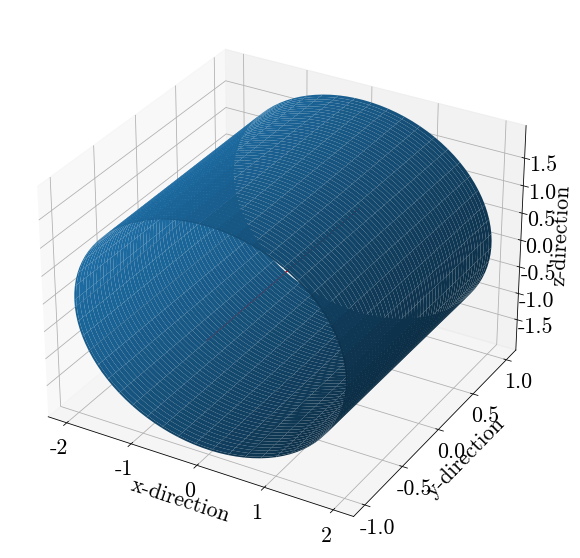

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
origin = np.array([0, 0, 0]) #axis and radius
p0 = np.array([0, 1, 0])
p1 = np.array([0, -1, 0])
R = 2 #vector in direction of axis
v = p1 - p0 #find magnitude of vector
mag = norm(v) #unit vector in direction of axis
v = v / mag #make some vector not in the same direction as v
not_v = np.array([1, 0, 0])
if (v == not_v).all():
    not_v = np.array([0, 1, 0]) #make vector perpendicular to v
n1 = np.cross(v, not_v) #normalize n1
n1 /= norm(n1) #make unit vector perpendicular to v and n1
n2 = np.cross(v, n1) #surface ranges over t from 0 to length of axis and 0 to 2*pi
t = np.linspace(0, mag, 100)
theta = np.linspace(0, 2 * np.pi, 100) #use meshgrid to make 2d arrays
t, theta = np.meshgrid(t, theta) #generate coordinates for surface
X, Y, Z = [p0[i] + v[i] * t + R * np.sin(theta) * n1[i] + R * np.cos(theta) * n2[i] for i in [0, 1, 2]]
ax.plot_surface(X, Y, Z)
ax.plot(*zip(p0, p1), color = 'red')


ax.set_ylabel('y-direction')
ax.set_xlabel('x-direction')
ax.set_zlabel('z-direction')

plt.show()

In [19]:
def cylinder(R, L): 
    origin = np.array([0, 0, 0])
    #axis and radius
    p0 = np.array([0, L, 0])
    p1 = np.array([0, -L, 0])
    R = 2 #vector in direction of axis
    v = p1 - p0 #find magnitude of vector
    mag = norm(v) #unit vector in direction of axis
    v = v / mag #make some vector not in the same direction as v

    not_v = np.array([1, 0, 0])
    if (v == not_v).all():
        not_v = np.array([0, 1, 0]) #make vector perpendicular to v

    n1 = np.cross(v, not_v) #normalize n1
    n1 /= norm(n1) #make unit vector perpendicular to v and n1
    n2 = np.cross(v, n1)
    t = np.linspace(0, mag, 100) #surface ranges over t from 0 to length of axis and 0 to 2*pi
    theta = np.linspace(0, 2 * np.pi, 100)
    t, theta = np.meshgrid(t, theta) #use meshgrid to make 2d arrays
    X, Y, Z = [p0[i] + v[i] * t + R * np.sin(theta) * n1[i] + R * np.cos(theta) * n2[i] for i in [0, 1, 2]] #generate coordinates for surface
    coord = np.swapaxes([X, Y, Z], 0, 2)
    coord = coord.reshape(10000,3)
    return(coord)


In [12]:
def Hollow_Cylinder_EF(a, b, lamb, p1, p2, y, L, R):

    # --- Arrays for Co-ordinates --- 

    r = []; Ex = []; Ey = []; E = [];  final_mag_E = [] #defining empty arrays 
    K = 1/(2*np.pi*8.854187817e-12); D = 1 # diameter of ring and constants 

    # print(np.shape(r_vec_prime))

    # --- Looping for various y values, where a and b are the x limits. --- 

    r_vec_prime = cylinder(R, L)

    for i in np.linspace(a, b, p1):
        r.append(i) # creating an array of r vectors 
        r_vec = ([i, y, 0]) # r vector used for one set of calculations 
        E = []
            
        for k in range(0, len(r_vec_prime)):
            rt = np.array(r_vec) -  np.array(r_vec_prime[k]) # calculation of R vector. 
            mag = np.linalg.norm(rt) # magnitude of r vector and r' vector 

            # --- calculating component of electric field 

            E_k = lamb*((rt)/mag**3)
            E.append(E_k)

        # --- Summation --- 

        final_mag_E.append(np.sum(E, axis = 0))
    
    return np.array(final_mag_E)*K, r

In [10]:
def Cylinder_EF(a, b, lamb, p1, p2, y, L, R):

    # --- Arrays for Co-ordinates --- 

    r = []; Ex = []; Ey = []; E = [];  final_mag_E = [] #defining empty arrays 
    K = 1/(4*np.pi*8.854187817e-12); D = 1 # diameter of ring and constants 

    # print(np.shape(r_vec_prime))

    # --- Looping for various y values, where a and b are the x limits. --- 

    for i in np.arange(0, R + 1):
        r_vec_prime = cylinder(1, L)

        for i in np.linspace(a, b, p1):
            r.append(i) # creating an array of r vectors 
            r_vec = ([i, y, 0]) # r vector used for one set of calculations 
            E = []
                
            for k in range(0, len(r_vec_prime)):
                rt = np.array(r_vec) -  np.array(r_vec_prime[k]) # calculation of R vector. 
                mag = np.linalg.norm(rt) # magnitude of r vector and r' vector 

                # --- calculating component of electric field 

                E_k = lamb*((rt)/mag**3)
                E.append(E_k)

            # --- Summation --- 

            final_mag_E.append(np.sum(E, axis = 0))
        
    return np.array(final_mag_E)*K, r

In [28]:
test = Hollow_Cylinder_EF(0, 5, 1, 100, 100, 1, 1, 2)
test2 = Hollow_Cylinder_EF(0, 5, 1, 100, 100, 3, 1, 2)
test3 = Hollow_Cylinder_EF(0, 5, 1, 100, 100, 0, 1, 2)

In [43]:
%%timeit
test4 = Hollow_Cylinder_EF(0, 5, 1, 100, 100, 0, 20, 2)

9.82 s ± 23.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


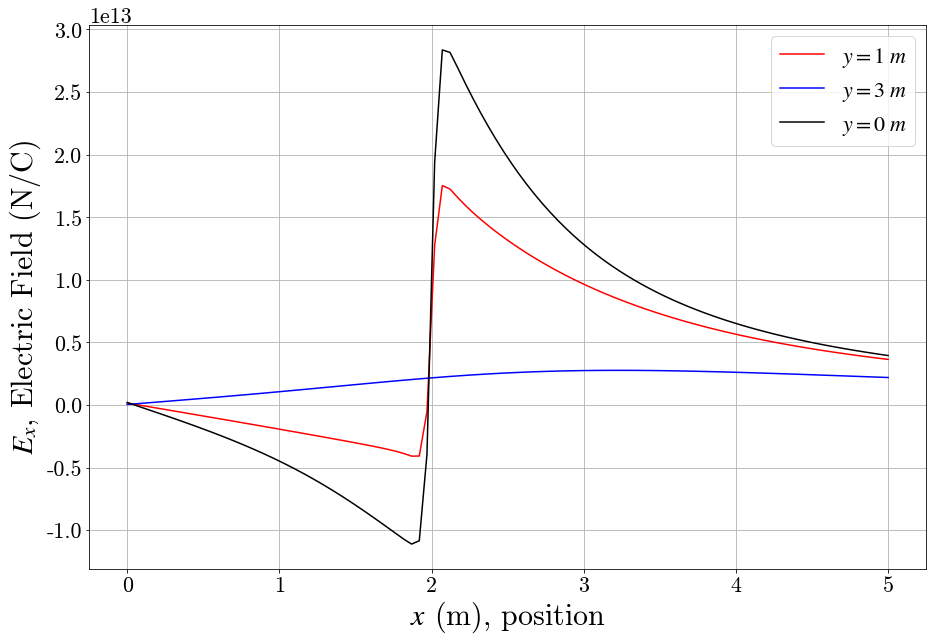

In [41]:
plt.plot(test[1], test[0][:, 0], label = '$y = 1 \; m$', color = 'red')
plt.plot(test2[1], test2[0][:, 0], label = '$y = 3 \; m$', color = 'blue')
plt.plot(test3[1], test3[0][:, 0], label = '$y = 0 \; m$', color = 'black')
# plt.plot(test4[1], test4[0][:, 0], label = '$y = 0 \; m$', color = 'green')

plt.ylabel("$E_x$, Electric Field (N/C)", fontsize = '30')
plt.xlabel("$x$ (m), position", fontsize = '30')

plt.grid()
plt.legend()

plt.savefig('images/exercise51.png', bbox_inches='tight')